In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs) 

Text(0,0.5,'Magnitud')

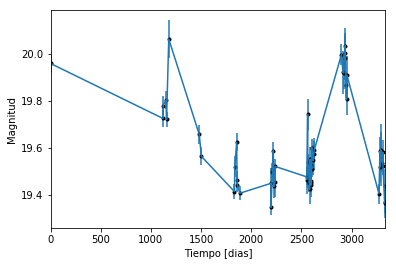

In [2]:
data = np.genfromtxt('LC_19608_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

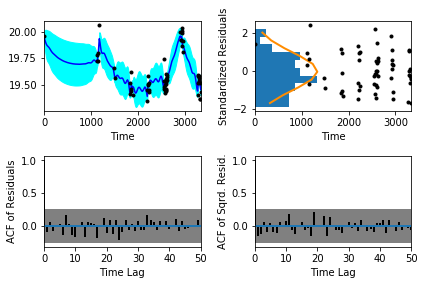

In [5]:
sample.assess_fit()

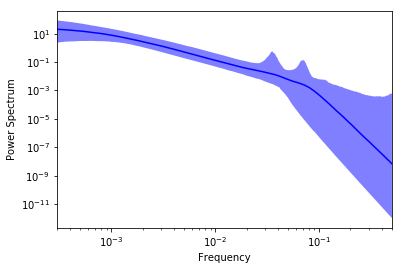

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000374595,0.240942,'Medida del nivel de ruido')

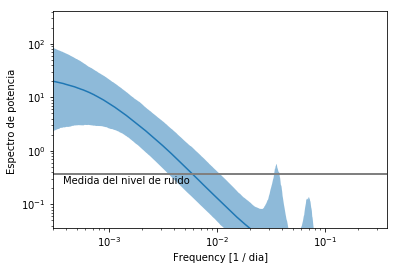

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

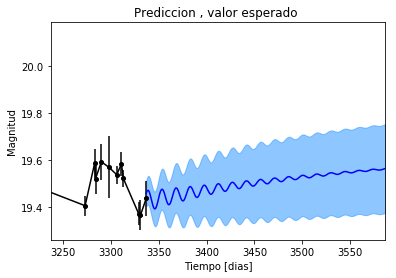

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

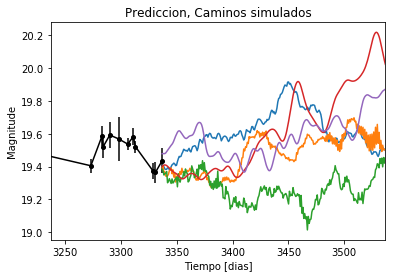

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


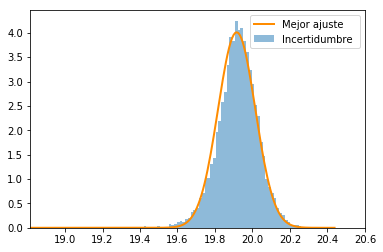

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

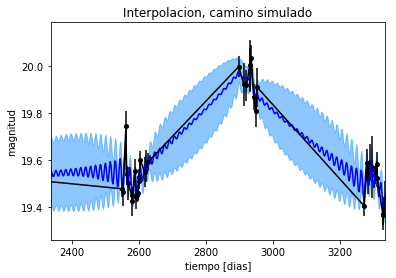

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

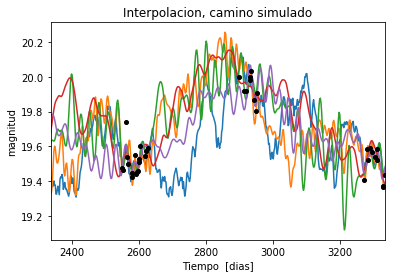

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 322.126366051
Median: 0.00693475758429
Standard deviation: 0.170374784112
68% credibility interval: [ 0.00126611  0.11809511]
95% credibility interval: [  4.55945806e-04   6.73168668e-01]
99% credibility interval: [  3.35625731e-04   9.47037946e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 331.618729612
Median: 0.00562921235635
Standard deviation: 0.10775200179
68% credibility interval: [ 0.00103071  0.06178923]
95% credibility interval: [ 0.0004047   0.35912142]
99% credibility interval: [  3.25291006e-04   7.97179225e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 264.109162892
Median: 0.106882499935
Standard de

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 322.126366051
Median: 0.00693475758429
Standard deviation: 0.170374784112
68% credibility interval: [ 0.00126611  0.11809511]
95% credibility interval: [  4.55945806e-04   6.73168668e-01]
99% credibility interval: [  3.35625731e-04   9.47037946e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 331.618729612
Median: 0.00562921235635
Standard deviation: 0.10775200179
68% credibility interval: [ 0.00103071  0.06178923]
95% credibility interval: [ 0.0004047   0.35912142]
99% credibility interval: [  3.25291006e-04   7.97179225e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 264.109162892
Median: 0.106882499935
Standard de

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 381.840268666
Median: 78.9187976861
Standard deviation: 2.14700957208
68% credibility interval: [ 76.74386497  80.97884702]
95% credibility interval: [ 73.98395325  82.38449591]
99% credibility interval: [ 71.87785074  83.13092102]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 262.085408845
Median: 1.07041575712
Standard deviation: 2.44266705942
68% credibility interval: [ 0.20198585  4.76142022]
95% credibility interval: [ 0.05145096  8.5162497 ]
99% credibility interval: [  0.02570601  11.92165906]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 438.450304883
Median: 0.563463438044
Standard deviation: 11.0505286601
68% credibility interval: [  0.08185909  13.30529629]
95% credibility interval: [  0.04756739

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 47214.3852087
Median: 3.97612862019e-26
Standard deviation: 3.54177651195e+99
68% credibility interval: [  3.53224441e-47   2.43021326e-04]
95% credibility interval: [  6.43105765e-68   2.09008222e+54]
99% credibility interval: [  1.85778007e-79   5.21560133e+92]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1434.4699488
Median: 19.6481221381
Standard deviation: 0.108199119031
68% credibility interval: [ 19.5604713   19.75010561]
95% credibility interval: [ 19.44287733  19.89070292]
99% credibility interval: [ 19.36560615  20.00071409]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 432.993035495
Median: 0.0699231782369
Standard deviation: 0.252856980048
68% credibility interval: [ 0.03408138  0.49657196]
95% credibility interval: [ 0.          0.92975652]
99% credibility interval: [ 0.          0.98722826]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 432.993035495
Median: 0.0699231782369
Standard deviation: 0.252856980048
68% credibility interval: [ 0.03408138  0.49657196]
95% credibility interval: [ 0.          0.92975652]
99% credibility interval: [ 0.          0.98722826]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 850.759236905
Median: 0.0
Standard deviation: 0.000279588068174
68% cr

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 381.840268666
Median: 78.9187976861
Standard deviation: 2.14700957208
68% credibility interval: [ 76.74386497  80.97884702]
95% credibility interval: [ 73.98395325  82.38449591]
99% credibility interval: [ 71.87785074  83.13092102]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 784.69956266
Median: 0.0573432193865
Standard deviation: 0.0378560919583
68% credibility interval: [ 0.0357213  0.095301 ]
95% credibility interval: [ 0.02467075  0.1640555 ]
99% credibility interval: [ 0.01956425  0.24038932]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 803.357318978
Median: 1.01572007031
Standard deviation: 0.195215502459
68% credibility interval: [ 0.84815803  1.22170879]
95% credibility interval: [ 0.71995842  1.48484272]
99% credibility interval: [ 0.63391324  1.66995695]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 475.472505554
Median: 0.00504468888487
Standard deviation: 0.602742856833
68% credibility interval: [  2.36168813e-04   2.62663938e-01]
95% credibility interval: [  5.62053768e-58   2.03960963e+00]
99% credibility interval: [  7.50911327e-95   3.97489702e+00]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 322.126366051
Median: (-0.0435723669625-2.10325479194j)
Standard deviation: 1.91574535795
68% credibility interval: [-0.74201346-0.58371555j -0.00795518-0.23401759j]
95% credibility interval: [ -4.22964348e+00-5.32636571j  -2.86479199e-03-0.46751245j]
99% credibility interval: [ -5.95041491e+00+0.j         -2.10879866e-03-1.7063241j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 331.618729612
Median: (-0.0353693843684+1.24204815592j)
Standard deviation: 1.72698633128
68% credibility interval: [-0.38823317+2.05757589j -0.00647614+0.70629754j]
95% credibility interval: [-2.25642643+1.48780369j -0.00254283+0.22321108j]
99% credibility interval: [ -5.00882480e+00+4.10461919j  -2.04386367e-03+0.43604951j]
Posterior summar